PRUEBAS


In [11]:
#importación de librerías para el proyecto
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#configuración de visualizaciones
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

#cargar el dataset
files_customer = ["customer-details.xlsx - 2012.csv", "customer-details.xlsx - 2013.csv", "customer-details.xlsx - 2014.csv"]
df_customers = pd.concat([pd.read_csv(file) for file in files_customer], ignore_index=True)

#cargar ela rchivo de datos bancarios
df_bank = pd.read_csv("bank-additional.csv")

df_customers.head()



,Unnamed: 0,Income,Kidhome,Teenhome,Dt_Customer,NumWebVisitsMonth,ID
0,0,161770,1,0,2012-04-04 00:00:00,29,089b39d8-e4d0-461b-87d4-814d71e0e079
1,1,85477,1,1,2012-12-30 00:00:00,7,e9d37224-cb6f-4942-98d7-46672963d097
2,2,147233,1,1,2012-02-02 00:00:00,5,3f9f49b5-e410-4948-bf6e-f9244f04918b
3,3,121393,1,2,2012-12-21 00:00:00,29,9991fafb-4447-451a-8be2-b0df6098d13e
4,4,63164,1,2,2012-06-20 00:00:00,20,eca60b76-70b6-4077-80ba-bc52e8ebb0eb


In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#configuración de visualizaciones
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

#cargar el dataset
df_bank = pd.read_csv('bank-additional.csv')
df_cust12 = pd.read_csv('customer-details.xlsx - 2012.csv')
df_cust13 = pd.read_csv('customer-details.xlsx - 2013.csv')
df_cust14 = pd.read_csv('customer-details.xlsx - 2014.csv')

#unir los dataframes de clientes
df_customers = pd.concat([df_cust12, df_cust13, df_cust14], ignore_index=True)

# --- Limpieza de df_bank ---

# 1. Renombrar columna para la unión
df_bank.rename(columns={'id_': 'ID'}, inplace=True)

# 2. Corregir columnas numéricas con comas
cols_con_comas = ['cons.price.idx', 'cons.conf.idx', 'euribor3m']
for col in cols_con_comas:
    # Reemplaza la coma por el punto y convierte a número
    df_bank[col] = df_bank[col].str.replace(',', '.', regex=False).astype(float)

# 3. Manejar valores nulos
# Para 'age' y 'euribor3m', usaremos la mediana (es más robusta a outliers que la media) para variables asimétricas, evitando que afecten los valores extremos.
df_bank['age'].fillna(df_bank['age'].median(), inplace=True)
df_bank['euribor3m'].fillna(df_bank['euribor3m'].median(), inplace=True)

# Para categóricas como 'education', 'default', etc., usaremos 'unknown'
cols_categoricas_nulas = ['education', 'default', 'housing', 'loan', 'marital', 'job']
for col in cols_categoricas_nulas:
    df_bank[col].fillna('unknown', inplace=True)

# 4. Convertir la columna 'date' a formato datetime (asumiendo formato día-mes-año)
import locale
locale.setlocale(locale.LC_TIME, 'es_ES.UTF-8') # Para reconocer meses en español
df_bank['date'] = pd.to_datetime(df_bank['date'], format='%d-%B-%Y', errors='coerce')

print("\nLimpieza de df_bank completada.")
df_bank.info()

#5. convertir las columnas con número float a enteros tipo 1,2,3,4,5 en la edad
df_bank['age'] = df_bank['age'].astype(int)

# --- Limpieza de df_customers ---
# Renombrar columna para la unión
df_customers.rename(columns={'id_': 'ID'}, inplace=True)

# 1. Convertir 'Dt_Customer' a datetime
df_customers['Dt_Customer'] = pd.to_datetime(df_customers['Dt_Customer'])

# 2. Manejar nulos en 'Income'
df_customers['Income'].fillna(df_customers['Income'].median(), inplace=True)

print("\nLimpieza de df_customers completada.")
df_customers.info()


# Unir los dos DataFrames usando la columna 'ID'
df_final = pd.merge(df_bank, df_customers, on='ID', how='inner')

print("\n¡DataFrames unidos con éxito!")
print(f"Dimensiones del DataFrame final: {df_final.shape}")
df_final.head()


Limpieza de df_bank completada.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43000 entries, 0 to 42999
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Unnamed: 0      43000 non-null  int64         
 1   age             43000 non-null  float64       
 2   job             43000 non-null  object        
 3   marital         43000 non-null  object        
 4   education       43000 non-null  object        
 5   default         43000 non-null  object        
 6   housing         43000 non-null  object        
 7   loan            43000 non-null  object        
 8   contact         43000 non-null  object        
 9   duration        43000 non-null  int64         
 10  campaign        43000 non-null  int64         
 11  pdays           43000 non-null  int64         
 12  previous        43000 non-null  int64         
 13  poutcome        43000 non-null  object        
 14  emp.var.rate    43000

C:\Users\oargo\AppData\Local\Temp\ipykernel_5516\4115044658.py:32: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_bank['age'].fillna(df_bank['age'].median(), inplace=True)
C:\Users\oargo\AppData\Local\Temp\ipykernel_5516\4115044658.py:33: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a co

,Unnamed: 0_x,age,job,marital,education,default,housing,loan,contact,duration,...,date,latitude,longitude,ID,Unnamed: 0_y,Income,Kidhome,Teenhome,Dt_Customer,NumWebVisitsMonth
0,0,38,housemaid,MARRIED,basic.4y,0.0,0.0,0.0,telephone,261,...,2019-08-02,41.495,-71.233,089b39d8-e4d0-461b-87d4-814d71e0e079,0,161770,1,0,2012-04-04,29
1,1,57,services,MARRIED,high.school,unknown,0.0,0.0,telephone,149,...,2016-09-14,34.601,-83.923,e9d37224-cb6f-4942-98d7-46672963d097,1,85477,1,1,2012-12-30,7
2,2,37,services,MARRIED,high.school,0.0,1.0,0.0,telephone,226,...,2019-02-15,34.939,-94.847,3f9f49b5-e410-4948-bf6e-f9244f04918b,2,147233,1,1,2012-02-02,5
3,3,40,admin.,MARRIED,basic.6y,0.0,0.0,0.0,telephone,151,...,2015-11-29,49.041,-70.308,9991fafb-4447-451a-8be2-b0df6098d13e,3,121393,1,2,2012-12-21,29
4,4,56,services,MARRIED,high.school,0.0,0.0,1.0,telephone,307,...,2017-01-29,38.033,-104.463,eca60b76-70b6-4077-80ba-bc52e8ebb0eb,4,63164,1,2,2012-06-20,20


In [ ]:
# 5. Crear nuevas características (Feature Engineering)
print("\nCreando nuevas características...")
# Simplificar 'education'
df_final['education_simplified'] = df_final['education'].replace({
    'basic.4y': 'Basic', 'basic.6y': 'Basic', 'basic.9y': 'Basic',
    'illiterate': 'Basic', 'unknown': 'Unknown'
})

# Crear grupos de edad
bins = [17, 30, 45, 60, 100]
labels = ['Joven (18-30)', 'Adulto (31-45)', 'Adulto Mayor (46-60)', 'Senior (60+)']
df_final['AgeGroup'] = pd.cut(df_final['age'], bins=bins, labels=labels, right=False)

# Extraer mes y año
df_final['CampaignYear'] = df_final['date'].dt.year
df_final['CampaignMonth'] = df_final['date'].dt.month_name()
print("✅ Nuevas características creadas.")

import pandas as pd
import numpy as np

# Cargar tu archivo CSV
# Asegúrate de que el archivo 'bank_customers_final.csv' esté en el directorio correcto.
try:
    df_final = pd.read_csv('bank_customers_final.csv')
except FileNotFoundError:
    print("No se encontró el archivo 'bank_customers_final.csv'.")
    exit()


# 1. --- APLICAR TUS TRANSFORMACIONES (para asegurar el contexto) ---

# Agrupar 'education'
df_final['education_simplified'] = df_final['education'].replace({
    'basic.4y': 'Basic', 'basic.6y': 'Basic', 'basic.9y': 'Basic', 'illiterate': 'Basic'
})

# Crear 'AgeGroup'
bins = [17, 30, 45, 60, 100]
labels = ['Joven (18-30)', 'Adulto (31-45)', 'Adulto Mayor (46-60)', 'Senior (60+)']
df_final['AgeGroup'] = pd.cut(df_final['age'], bins=bins, labels=labels, right=False)

# Crear 'PreviouslyContacted'
df_final['PreviouslyContacted'] = np.where(df_final['pdays'] == 999, 'No', 'Yes')

# Eliminar columnas antiguas y no deseadas
columns_to_drop = [
    'education', 'date', 'pdays', 'ID', 'latitude', 'longitude',
    'Unnamed: 0_x', 'Unnamed: 0_y', 'CampaignYear', 'CampaignMonth'
]
df_final.drop(columns=columns_to_drop, inplace=True, errors='ignore')


# 2. --- REORGANIZAR LAS COLUMNAS ---

print("\n--- Columnas antes de reorganizar ---")
print(df_final.columns.tolist())

# Definir el nuevo orden de las columnas
# Es una buena práctica poner la variable objetivo ('y') al final.
new_column_order = [
    # Información Demográfica y del Cliente
    'age',
    'AgeGroup',
    'job',
    'marital',
    'education_simplified',
    'Income',
    'Kidhome',
    'Teenhome',
    'Dt_Customer',
    'default',
    'housing',
    'loan',

    # Información de la Campaña de Marketing
    'contact',
    'duration',
    'campaign',
    'previous',
    'PreviouslyContacted',
    'poutcome',
    'NumWebVisitsMonth',

    # Indicadores Macroeconómicos
    'emp.var.rate',
    'cons.price.idx',
    'cons.conf.idx',
    'euribor3m',
    'nr.employed',

    # Variable Objetivo (la más importante)
    'y'
]

# Aplicar el nuevo orden
df_reordenado = df_final[new_column_order]

print("\n--- Columnas DESPUÉS de reorganizar ---")
print(df_reordenado.columns.tolist())

# Mostrar las primeras filas para verificar el nuevo orden
print("\n--- Vista previa del DataFrame reordenado ---")
print(df_reordenado.head())

# Puedes guardar este DataFrame final en un nuevo CSV
df_reordenado.to_csv('bank_data_reordenado.csv', index=False)
print("\nDataFrame reordenado guardado como 'bank_data_reordenado.csv'")

df_reordenado.sample(15)


Creando nuevas características...
✅ Nuevas características creadas.
No se encontró el archivo 'bank_customers_final.csv'.

--- Columnas antes de reorganizar ---
['age', 'job', 'marital', 'default', 'housing', 'loan', 'contact', 'duration', 'campaign', 'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'y', 'Income', 'Kidhome', 'Teenhome', 'Dt_Customer', 'NumWebVisitsMonth', 'education_simplified', 'AgeGroup', 'PreviouslyContacted']

--- Columnas DESPUÉS de reorganizar ---
['age', 'AgeGroup', 'job', 'marital', 'education_simplified', 'Income', 'Kidhome', 'Teenhome', 'Dt_Customer', 'default', 'housing', 'loan', 'contact', 'duration', 'campaign', 'previous', 'PreviouslyContacted', 'poutcome', 'NumWebVisitsMonth', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'y']

--- Vista previa del DataFrame reordenado ---
   age              AgeGroup        job  marital education_simplified  Income  \
0   38        A

,age,AgeGroup,job,marital,education_simplified,Income,Kidhome,Teenhome,Dt_Customer,default,...,previous,PreviouslyContacted,poutcome,NumWebVisitsMonth,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
33638,41,Adulto (31-45),services,MARRIED,high.school,34110,2,1,2014-02-01,0.0,...,0,No,NONEXISTENT,29,-1.8,92.893,-46.2,1.281,"5099,1",no
10345,48,Adulto Mayor (46-60),technician,MARRIED,high.school,142021,0,2,2012-02-05,0.0,...,0,No,NONEXISTENT,29,1.4,94.465,-41.8,4.960,"5228,1",no
17823,57,Adulto Mayor (46-60),admin.,DIVORCED,university.degree,178691,0,1,2012-12-01,unknown,...,0,No,NONEXISTENT,19,1.4,93.918,-42.7,4.857,"5228,1",yes
17682,39,Adulto (31-45),admin.,SINGLE,high.school,7373,0,2,2012-06-06,0.0,...,0,No,NONEXISTENT,31,1.4,93.918,-42.7,4.961,"5228,1",no
6765,47,Adulto Mayor (46-60),admin.,MARRIED,high.school,174995,2,0,2012-12-11,0.0,...,0,No,NONEXISTENT,16,1.1,93.994,-36.4,4.857,5191,no
32996,33,Adulto (31-45),blue-collar,MARRIED,Basic,78237,2,1,2014-05-21,0.0,...,0,No,NONEXISTENT,23,-1.8,92.893,-46.2,1.291,"5099,1",no
23951,50,Adulto Mayor (46-60),entrepreneur,MARRIED,university.degree,98013,2,0,2013-12-30,0.0,...,0,No,NONEXISTENT,8,-0.1,93.200,-42.0,4.700,"5195,8",yes
14137,27,Joven (18-30),technician,SINGLE,professional.course,70819,1,2,2012-08-29,0.0,...,0,No,NONEXISTENT,6,1.4,93.918,-42.7,4.962,"5228,1",no
3346,31,Adulto (31-45),blue-collar,DIVORCED,Basic,54559,2,1,2012-02-28,0.0,...,0,No,NONEXISTENT,27,1.1,93.994,-36.4,4.860,5191,no
40865,36,Adulto (31-45),unemployed,MARRIED,high.school,153235,2,0,2014-09-25,0.0,...,1,Yes,SUCCESS,30,-1.1,94.601,-49.5,1.032,"4963,6",yes


: 

Gráfico de boxplots guardado como 'boxplots_outliers.png'


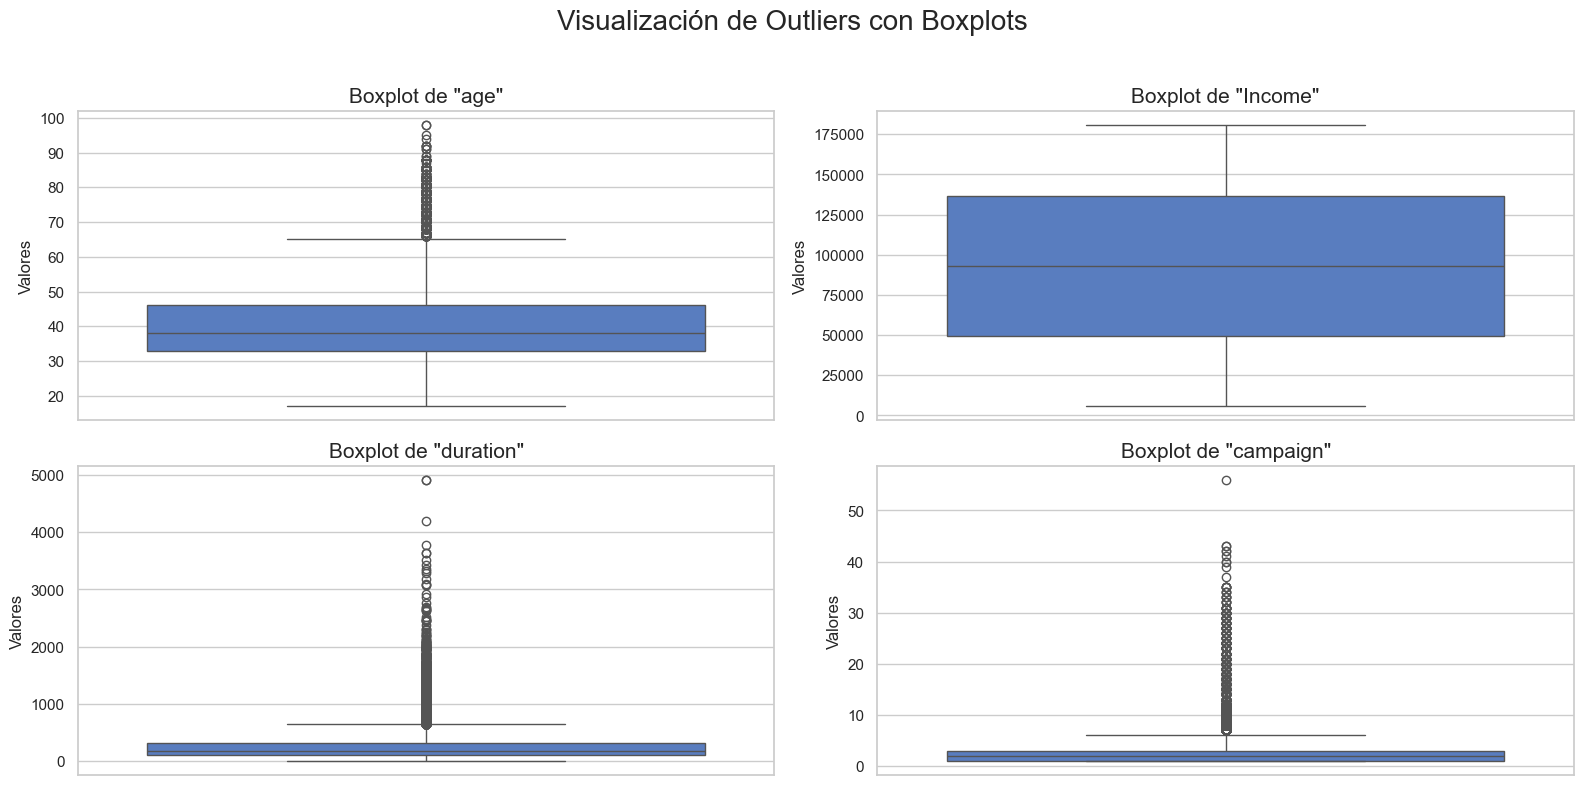

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar el último archivo CSV que generamos, 100% limpio
try:
    df_reordenado = pd.read_csv('bank_data_EDA_ready.csv')
except FileNotFoundError:
    print("No se encontró el archivo 'bank_data_EDA_ready.csv'.")
    exit()

# Seleccionar las columnas numéricas para visualizar
cols_numericas = ['age', 'Income', 'duration', 'campaign']

# Configurar el estilo de la visualización
sns.set(style="whitegrid", palette="muted")
plt.figure(figsize=(16, 8))
plt.suptitle('Visualización de Outliers con Boxplots', fontsize=20)

# Generar un boxplot para cada columna seleccionada
for i, col in enumerate(cols_numericas):
    plt.subplot(2, 2, i + 1)
    sns.boxplot(y=df_reordenado[col])
    plt.title(f'Boxplot de "{col}"', fontsize=15)
    plt.ylabel('Valores')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.savefig("boxplots_outliers.png")
print("Gráfico de boxplots guardado como 'boxplots_outliers.png'")
plt.show()

Gráfico de análisis categórico guardado como 'analisis_categorico_vs_suscripcion.png'


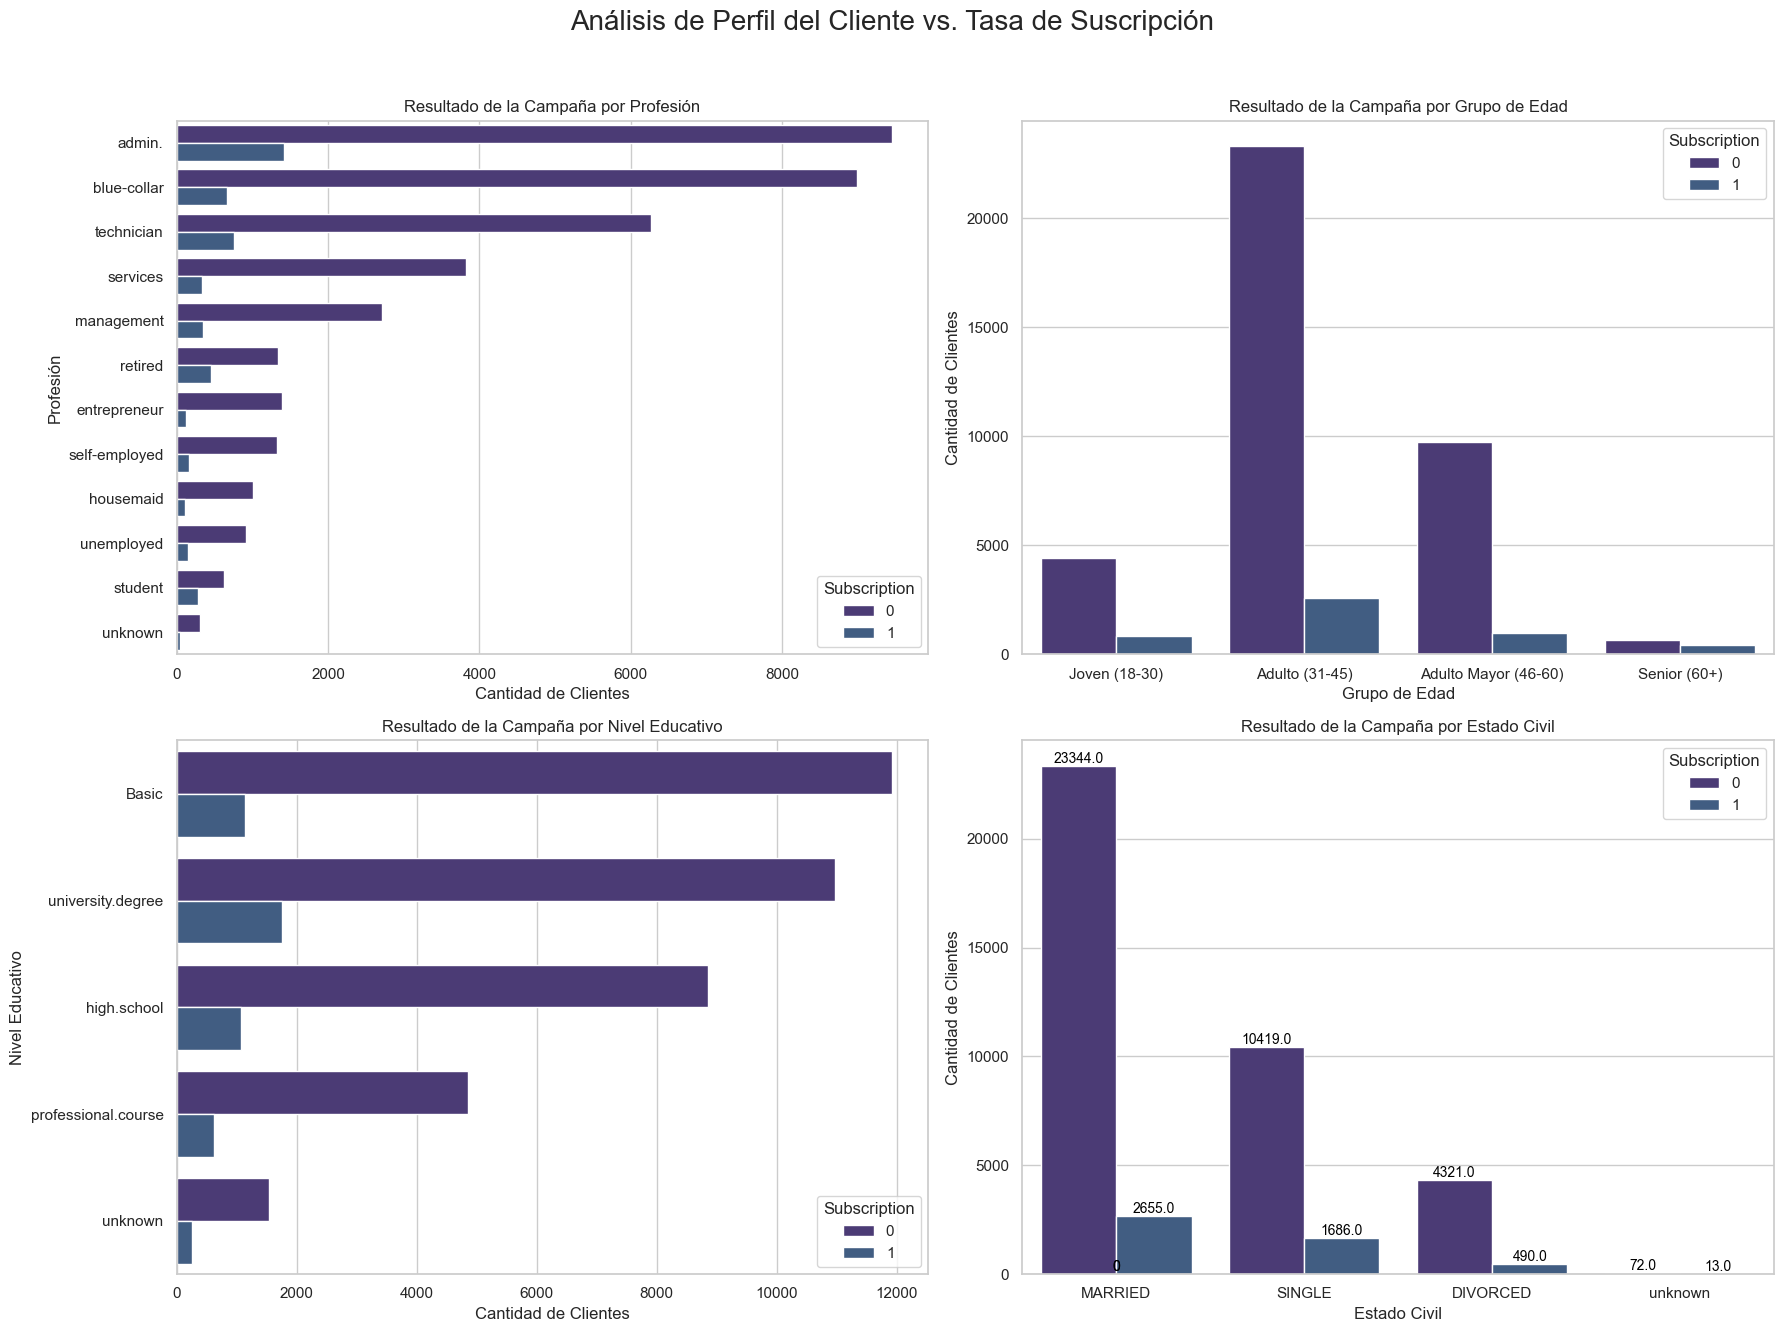

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar el conjunto de datos final y limpio
try:
    df = pd.read_csv('bank_data_EDA_ready.csv')
except FileNotFoundError:
    print("No se encontró el archivo 'bank_data_EDA_ready.csv'.")
    exit()

# Configurar el estilo de la visualización
sns.set(style="whitegrid", palette="viridis")
fig, axes = plt.subplots(2, 2, figsize=(18, 14))
fig.suptitle('Análisis de Perfil del Cliente vs. Tasa de Suscripción', fontsize=20)

# --- Gráfico 1: Profesión vs. Suscripción ---
sns.countplot(ax=axes[0, 0], data=df_reordenado, y='job', hue='Subscription', order=df_reordenado['job'].value_counts().index)
axes[0, 0].set_title('Resultado de la Campaña por Profesión')
axes[0, 0].set_xlabel('Cantidad de Clientes')
axes[0, 0].set_ylabel('Profesión')

# --- Gráfico 2: Grupo de Edad vs. Suscripción ---
sns.countplot(ax=axes[0, 1], data=df_reordenado, x='AgeGroup', hue='Subscription', order=['Joven (18-30)', 'Adulto (31-45)', 'Adulto Mayor (46-60)', 'Senior (60+)'])
axes[0, 1].set_title('Resultado de la Campaña por Grupo de Edad')
axes[0, 1].set_xlabel('Grupo de Edad')
axes[0, 1].set_ylabel('Cantidad de Clientes')

# --- Gráfico 3: Nivel Educativo vs. Suscripción ---
sns.countplot(ax=axes[1, 0], data=df_reordenado, y='Education', hue='Subscription', order=df_reordenado['Education'].value_counts().index)
axes[1, 0].set_title('Resultado de la Campaña por Nivel Educativo')
axes[1, 0].set_xlabel('Cantidad de Clientes')
axes[1, 0].set_ylabel('Nivel Educativo')

# --- Gráfico 4: Estado Civil vs. Suscripción ---
sns.countplot(ax=axes[1, 1], data=df_reordenado,x='marital', hue='Subscription')
axes[1, 1].set_title('Resultado de la Campaña por Estado Civil')
axes[1, 1].set_xlabel('Estado Civil')
axes[1, 1].set_ylabel('Cantidad de Clientes')
# mostrar los datos dentro del gráfico
for p in axes[1, 1].patches:
    axes[1, 1].annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                        ha='center', va='bottom', fontsize=10, color='black', rotation=0)
    



plt.tight_layout(rect=[0, 0.03, 1, 0.96])
plt.savefig("analisis_categorico_vs_suscripcion.png")
print("Gráfico de análisis categórico guardado como 'analisis_categorico_vs_suscripcion.png'")
plt.show()



Gráfico con anotaciones guardado como 'grafico_con_anotaciones.png'


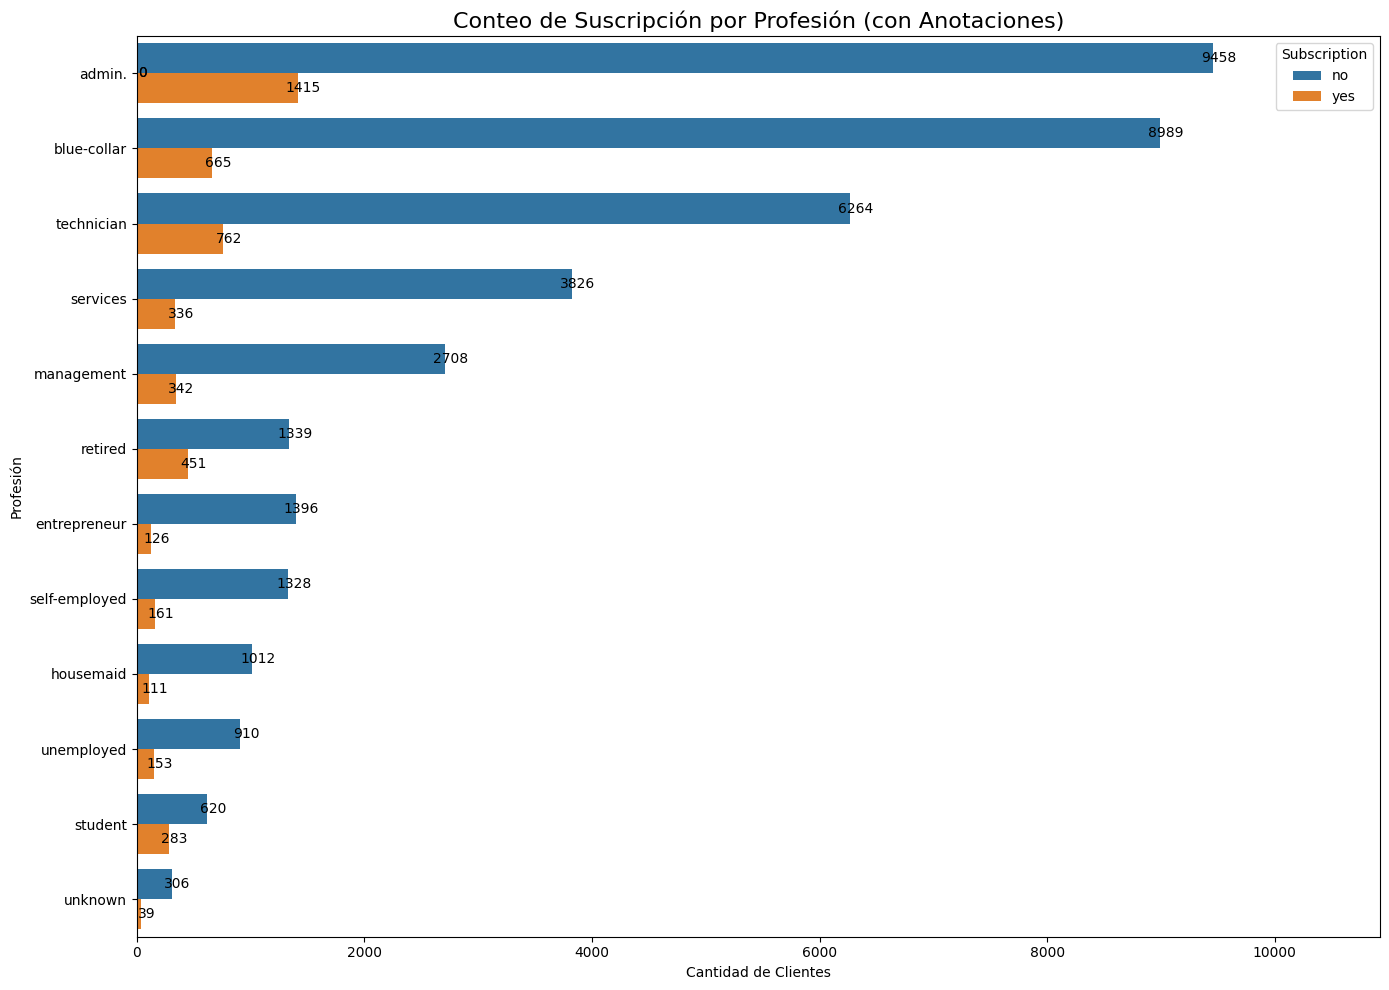

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar el conjunto de datos

df = pd.read_csv('bank_data_EDA_ready.csv')
# Crear el gráfico
fig, ax = plt.subplots(figsize=(14, 10))
sns.countplot(data=df, y='job', hue='Subscription', ax=ax, order=df['job'].value_counts().index)

# Añadir las anotaciones (los números)
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    ax.text(x + width + 50,  # Posición x del texto
            y + height / 2,  # Posición y del texto
            f'{int(width)}', # El texto a mostrar (el ancho de la barra)
            ha='center',
            va='center')

ax.set_title('Conteo de Suscripción por Profesión (con Anotaciones)', fontsize=16)
ax.set_xlabel('Cantidad de Clientes')
ax.set_ylabel('Profesión')

# Ajustar los límites del eje x para que quepan las etiquetas
ax.set_xlim(right=ax.get_xlim()[1] * 1.1)

plt.tight_layout()
plt.savefig("grafico_con_anotaciones.png")
print("Gráfico con anotaciones guardado como 'grafico_con_anotaciones.png'")
plt.show()



Mapa de calor de correlaciones guardado como 'mapa_correlacion.png'


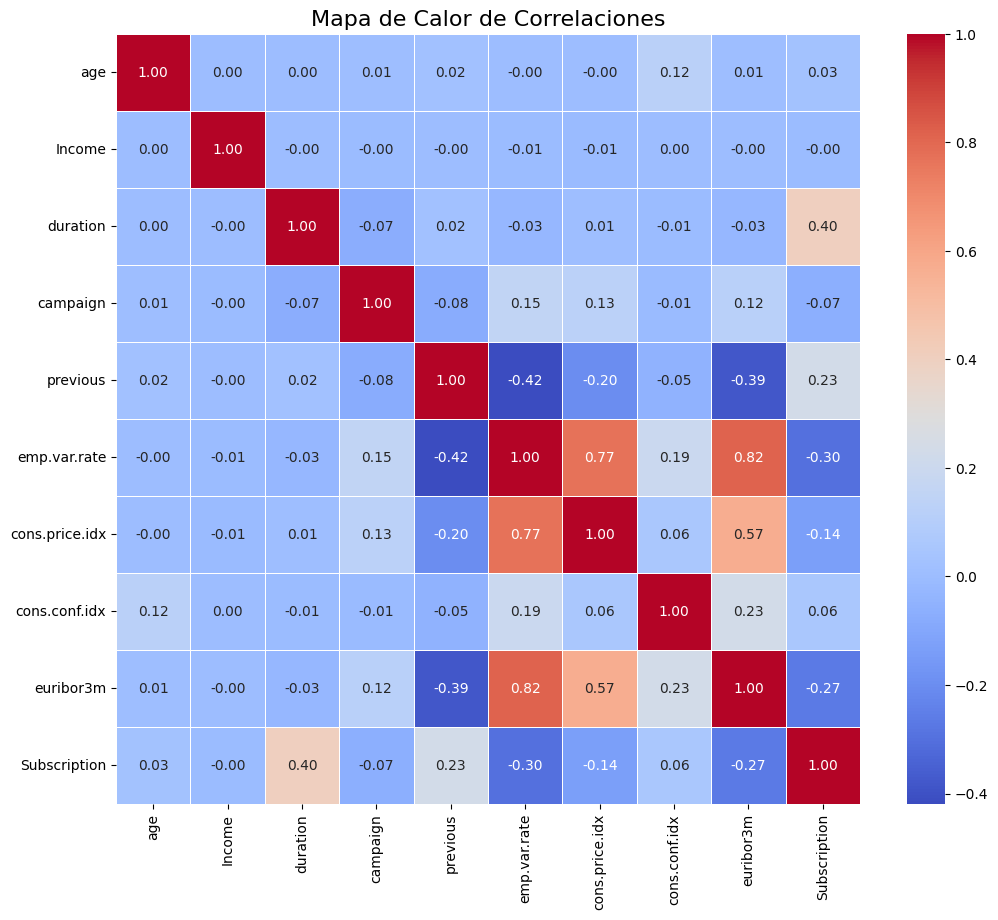

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar el conjunto de datos final y limpio
try:
    df_reordenado = pd.read_csv('bank_data_EDA_ready.csv')
except FileNotFoundError:
    print("No se encontró el archivo 'bank_data_EDA_ready.csv'.")
    exit()

# Para el mapa de correlación, necesitamos convertir 'suscrito' a número (0 y 1)
df_reordenado['Subscription'] = df_reordenado['Subscription'].apply(lambda x: 1 if x == 'yes' else 0)

# Seleccionar solo las columnas numéricas relevantes para la correlación
numeric_cols = [
    'age', 'Income', 'duration', 'campaign', 'previous',
    'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'Subscription',
]

# Calcular la matriz de correlación
correlation_matrix = df_reordenado[numeric_cols].corr()

# Crear el mapa de calor
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Mapa de Calor de Correlaciones', fontsize=16)
plt.savefig("mapa_correlacion.png")
print("Mapa de calor de correlaciones guardado como 'mapa_correlacion.png'")
plt.show()

Conclusiones del Mapa de Calor
Fuerte Correlación con el Éxito (suscrito_num):

duration tiene una correlación positiva de 0.40, la más alta de todas. Confirma numéricamente que a mayor duración de la llamada, mayor probabilidad de éxito.

previous (contactos previos) también tiene una correlación positiva (0.23), lo que indica que haber contactado antes al cliente ayuda.

Multicolinealidad en Variables Económicas:

Observa la fuerte correlación entre emp.var.rate, euribor3m y cons.price.idx (valores de 0.82, 0.77, etc.). Estas variables se mueven casi al unísono. Al construir un modelo, probablemente no necesitaríamos incluirlas todas, ya que contienen información muy similar.

Otras Observaciones:

La edad (age) y los ingresos (Income) tienen una correlación muy baja con el resultado (Subscription), lo que sugiere que no son buenos predictores por sí solos de forma lineal.

In [15]:
import pandas as pd

# Cargar el conjunto de datos
df_reordenado = pd.read_csv('bank_data_EDA_ready.csv')

# Filtrar solo los clientes que se suscribieron
df_exito = df_reordenado[df_reordenado['Subscription'] == 'yes']

print("--- Perfil del Cliente que ACEPTA la Oferta ---")
# Usamos .describe() con include='all' para ver tanto variables numéricas como categóricas
print(df_exito.describe(include='all').round(2))

--- Perfil del Cliente que ACEPTA la Oferta ---
            age        AgeGroup     job  marital          Education  \
count   4844.00            4844    4844     4844               4844   
unique      NaN               4      12        4                  5   
top         NaN  Adulto (31-45)  admin.  MARRIED  university.degree   
freq        NaN            2574    1415     2655               1748   
mean      40.54             NaN     NaN      NaN                NaN   
std       13.01             NaN     NaN      NaN                NaN   
min       17.00             NaN     NaN      NaN                NaN   
25%       31.00             NaN     NaN      NaN                NaN   
50%       38.00             NaN     NaN      NaN                NaN   
75%       47.00             NaN     NaN      NaN                NaN   
max       98.00             NaN     NaN      NaN                NaN   

           Income  Kidhome  Teenhome Dt_Customer default  ... previous  \
count     4844.00  4844.0

Gráfico de análisis geoespacial guardado como 'analisis_geoespacial.png'


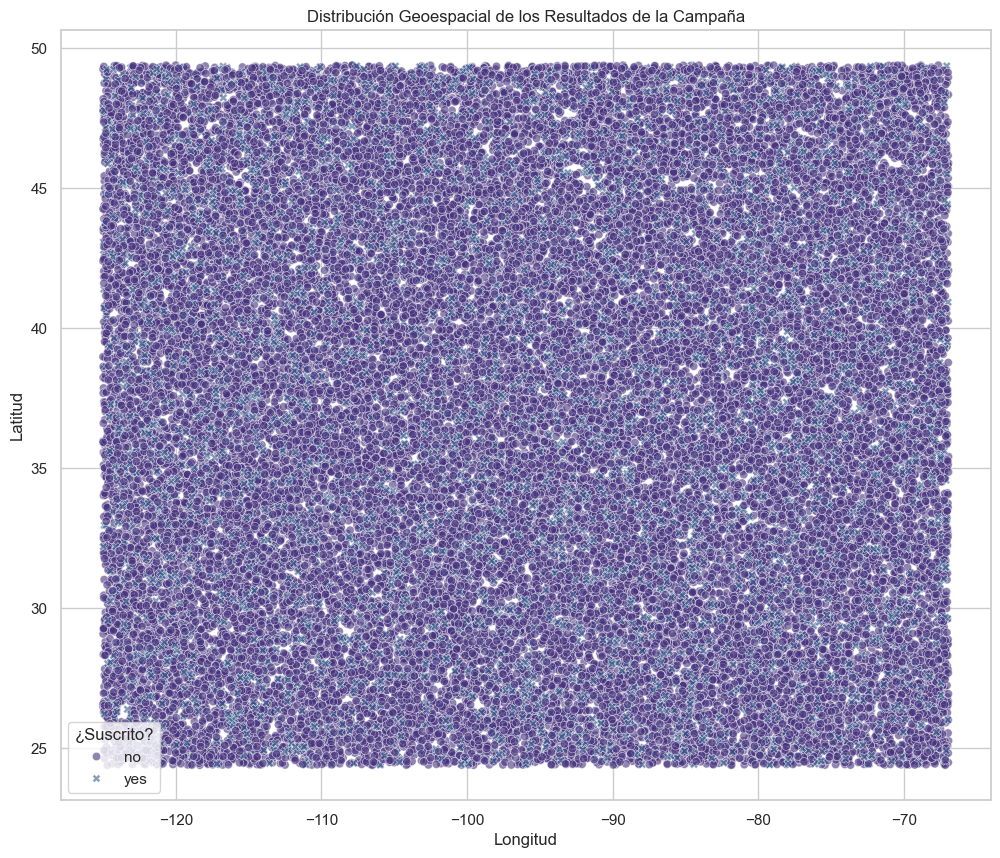

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Para este gráfico, necesitamos el archivo original que contiene latitud y longitud
df_geo = pd.read_csv('bank-additional.csv')

# Eliminar filas con datos de ubicación nulos si existen
df_geo.dropna(subset=['latitude', 'longitude'], inplace=True)

plt.figure(figsize=(12, 10))
sns.scatterplot(
    data=df_geo,
    x='longitude',
    y='latitude',
    hue='y', # Usamos la 'y' original
    style='y',
    alpha=0.6
)
plt.title('Distribución Geoespacial de los Resultados de la Campaña')
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.legend(title='¿Suscrito?')
plt.savefig("analisis_geoespacial.png")
print("Gráfico de análisis geoespacial guardado como 'analisis_geoespacial.png'")
plt.show()

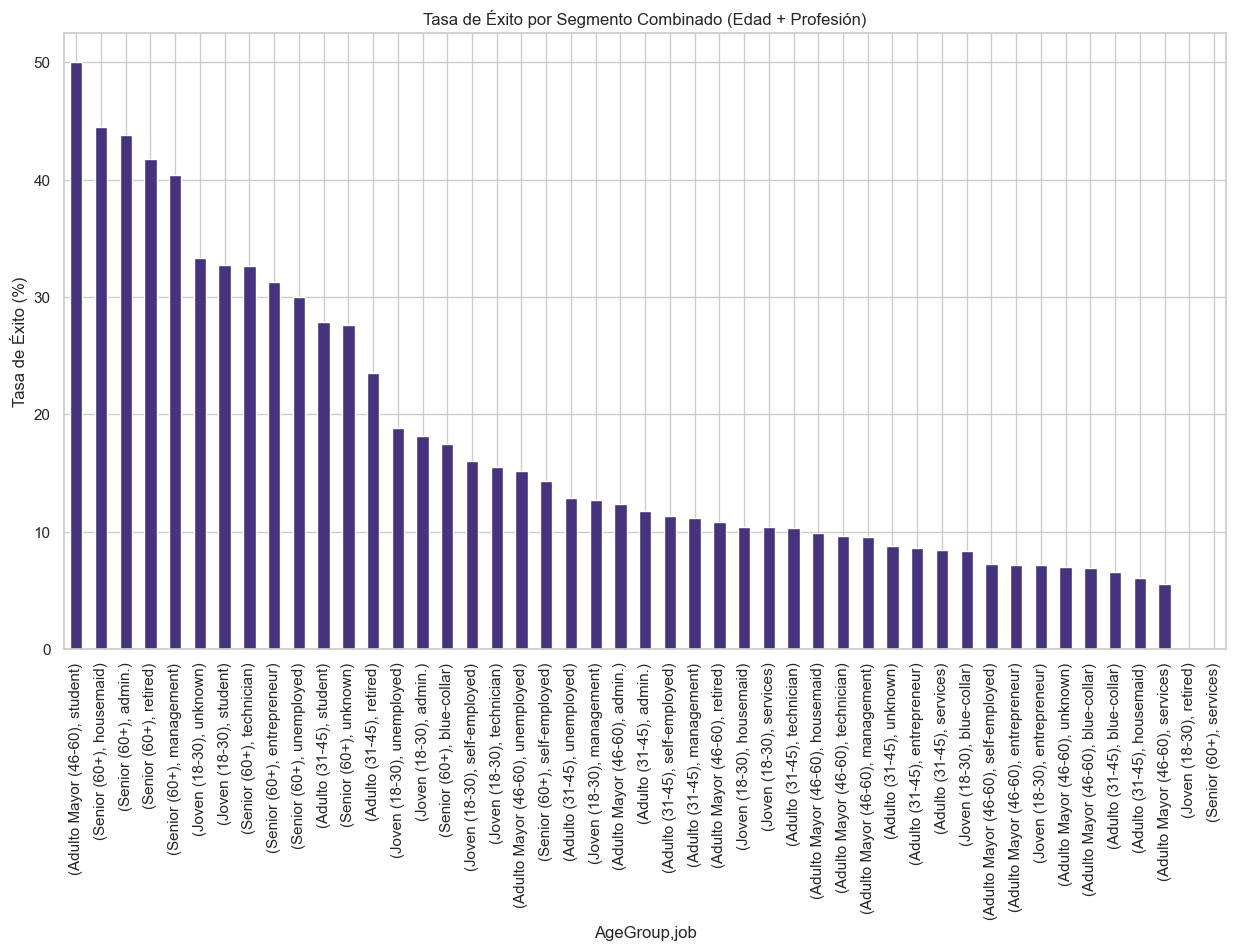

In [23]:
import pandas as pd
# Cargar datos
df_reordenado = pd.read_csv('bank_data_EDA_ready.csv')
# Calcular la tasa de éxito por grupo
tasa_exito_combinada = df_reordenado.groupby(['AgeGroup', 'job'])['Subscription'].value_counts(normalize=True).unstack()
tasa_exito_combinada['yes_rate'] = tasa_exito_combinada.get('yes', 0) * 100
# Visualizar 'yes_rate'
tasa_exito_combinada['yes_rate'].sort_values(ascending=False).plot(kind='bar', figsize=(15,8))
plt.ylabel('Tasa de Éxito (%)')
plt.title('Tasa de Éxito por Segmento Combinado (Edad + Profesión)')
plt.show()

Gráfico de comportamiento guardado como 'grafico_comportamiento_vs_suscripcion.png'


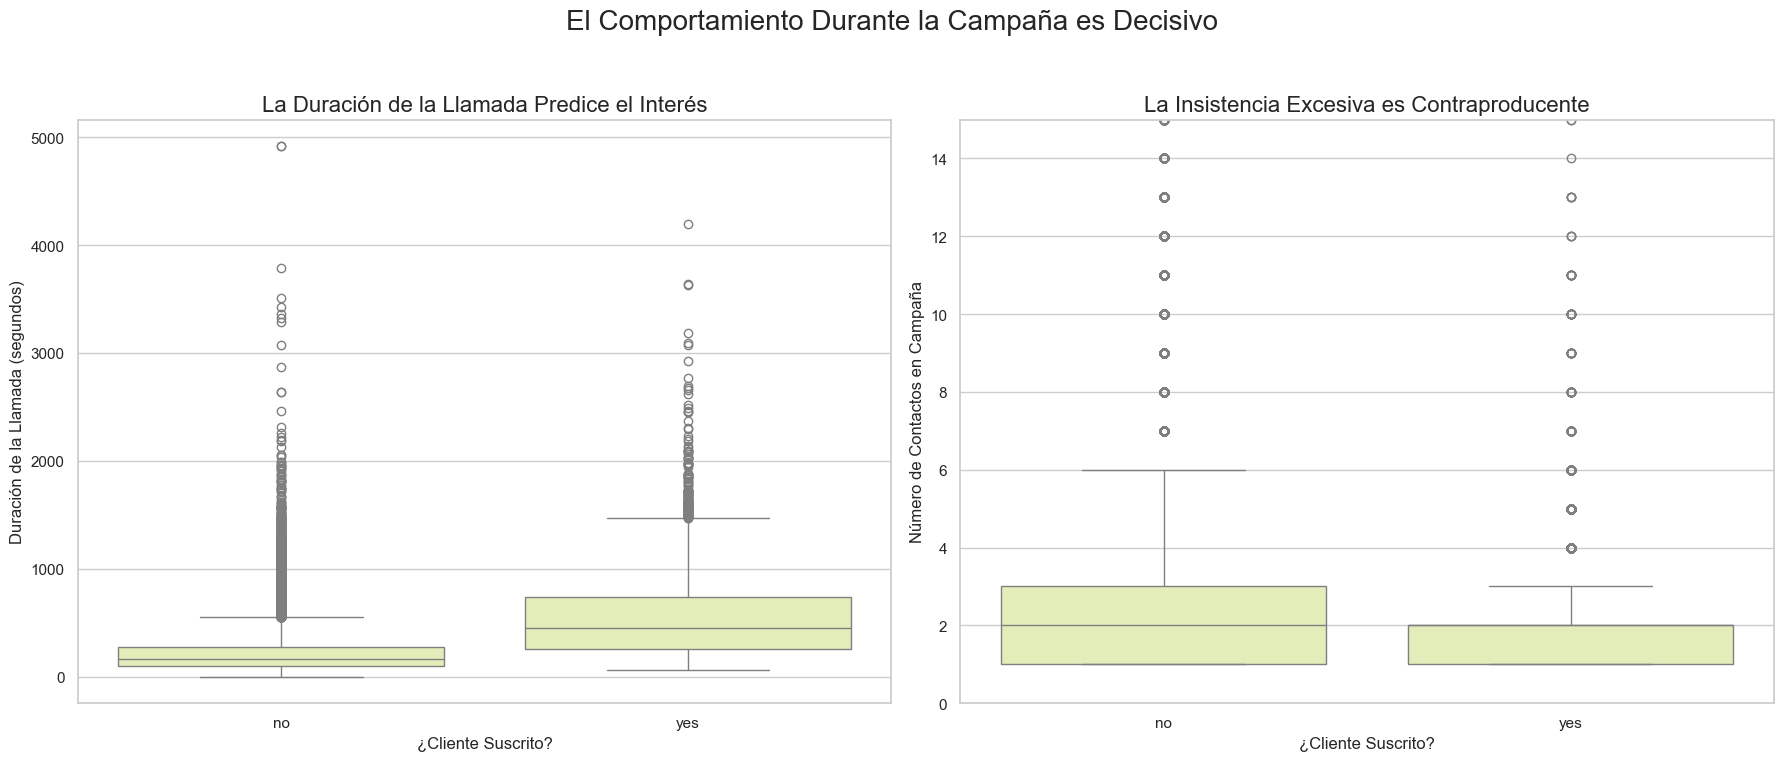

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar el conjunto de datos final y limpio
try:
    df = pd.read_csv('bank_data_EDA_ready.csv')
except FileNotFoundError:
    print("No se encontró el archivo 'bank_data_EDA_ready.csv'. Asegúrate de que se haya ejecutado el paso anterior.")
    exit()

# Configurar el estilo de la visualización
sns.set(style="whitegrid", palette="YlGnBu")
fig, axes = plt.subplots(1, 2, figsize=(18, 8)) # 1 fila, 2 columnas
fig.suptitle('El Comportamiento Durante la Campaña es Decisivo', fontsize=20)

# --- Gráfico 1: Duración de la llamada vs. Suscripción ---
sns.boxplot(ax=axes[0], data=df, x='Subscription', y='duration', order=['no', 'yes'])
axes[0].set_title('La Duración de la Llamada Predice el Interés', fontsize=16)
axes[0].set_xlabel('¿Cliente Suscrito?', fontsize=12)
axes[0].set_ylabel('Duración de la Llamada (segundos)', fontsize=12)

# --- Gráfico 2: Nº de Contactos vs. Suscripción ---
sns.boxplot(ax=axes[1], data=df, x='Subscription', y='campaign', order=['no', 'yes'])
axes[1].set_title('La Insistencia Excesiva es Contraproducente', fontsize=16)
axes[1].set_xlabel('¿Cliente Suscrito?', fontsize=12)
axes[1].set_ylabel('Número de Contactos en Campaña', fontsize=12)

# IMPORTANTE: Los outliers en 'campaign' son tan extremos que aplastan las cajas
# y no nos dejan ver la distribución. Limitamos el eje Y para hacer zoom
# en la parte más importante de los datos (el 99% de los casos).
axes[1].set_ylim(0, 15)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.savefig("grafico_comportamiento_vs_suscripcion.png")
print("Gráfico de comportamiento guardado como 'grafico_comportamiento_vs_suscripcion.png'")
plt.show()

ESTADISTICA INFERENCIAL
PRUEBA DE T Y CHI CUADRADO

In [26]:
pip install scipy


   ---------------------------------------- 0.0/38.5 MB ? eta -:--:--
   ---------- ----------------------------- 10.2/38.5 MB 52.2 MB/s eta 0:00:01
   ------------------ --------------------- 18.1/38.5 MB 46.1 MB/s eta 0:00:01
   ---------------------------- ----------- 27.0/38.5 MB 44.5 MB/s eta 0:00:01
   ------------------------------------- -- 36.2/38.5 MB 43.9 MB/s eta 0:00:01
   ---------------------------------------- 38.5/38.5 MB 39.4 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:

import pandas as pd
from scipy import stats

# Cargar tu conjunto de datos
try:
    df = pd.read_csv('bank_data_EDA_ready.csv')
except FileNotFoundError:
    print("Asegúrate de que el archivo 'bank_data_EDA_ready.csv' exista en el directorio.")
    exit()

# Separar los dos grupos basados en la columna 'Subscription'
ingresos_si = df[df['Subscription'] == 'yes']['Income']
ingresos_no = df[df['Subscription'] == 'no']['Income']

# Realizar la prueba T
t_stat, p_value = stats.ttest_ind(ingresos_si, ingresos_no, equal_var=False)

print("--- 1. Resultados de la Prueba T para Ingresos vs. Subscription ---")
print(f"P-valor: {p_value:.4f}")

# Conclusión basada en el p-valor
if p_value < 0.05:
    print("Conclusión: La diferencia en los ingresos medios ES estadísticamente significativa.")
else:
    print("Conclusión: No hay evidencia estadística de una diferencia en los ingresos medios.")



import pandas as pd
from scipy.stats import chi2_contingency

# Cargar tu conjunto de datos
df = pd.read_csv('bank_data_EDA_ready.csv')

# Crear la tabla de contingencia
contingency_table = pd.crosstab(df['job'], df['Subscription'])

# Realizar la prueba Chi-Cuadrado
chi2, p_value, dof, expected = chi2_contingency(contingency_table)

print("\n--- 2. Resultados de la Prueba Chi-Cuadrado para Profesión vs. Subscription ---")
print(f"P-valor: {p_value:.4f}")

# Conclusión basada en el p-valor
if p_value < 0.05:
    print("Conclusión: La asociación entre la profesión y la suscripción ES estadísticamente significativa.")
else:
    print("Conclusión: No hay evidencia de una asociación entre la profesión y la suscripción.")

--- 1. Resultados de la Prueba T para Ingresos vs. Subscription ---
P-valor: 0.3344
Conclusión: No hay evidencia estadística de una diferencia en los ingresos medios.

--- 2. Resultados de la Prueba Chi-Cuadrado para Profesión vs. Subscription ---
P-valor: 0.0000
Conclusión: La asociación entre la profesión y la suscripción ES estadísticamente significativa.
